# KiDs TXPipe Outputs

In [2]:
import matplotlib
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import treecorr
import h5py   
from math import *
%matplotlib inline
from scipy import stats

## Input Shear Catalog

In [3]:
path = '/global/cscratch1/sd/elp25/txpipe-reanalysis/kv450/data/DR3/'

In [4]:
shear =  h5py.File(path + 'shear_catalog_kids450_nonmetacal.h5', 'r')

In [5]:
len(shear['shear']['g1'])

14650348

In [6]:
num_objs = 14650348

In [7]:
mean_zs = shear['shear']['mean_z'][()]

In [8]:
snrs = shear['shear']['s2n'][()]

In [9]:
Ts = shear['shear']['T'][()]

In [10]:
Ts_psf = shear['shear']['psf_T_mean'][()]

In [11]:
for member in shear['shear']:
    print(member)

T
dec
flags
g1
g2
lensfit_weight
mag_err_i
mag_err_r
mag_i
mag_r
mean_z
objectId
psf_T_mean
psf_g1
psf_g2
ra
region
s2n
snr_i
snr_r
tilename


In [14]:
len(source_bins[source_bins!=-1])/len(source_bins)*100

NameError: name 'source_bins' is not defined

* T_cut: 0.5
* s2n_cut: 20.0
* max_rows: 1000
* delta_gamma: 0.02
* zbin_edges: [0.1, 0.3, 0.5, 0.7, 0.9, 1.2]

In [15]:
print(len(mean_zs[np.argwhere(np.isnan(mean_zs))]))

0


In [16]:
print((len(mean_zs[(mean_zs>0.1) & (mean_zs<1.2)])/num_objs)*100,'% remaining after z binning.')

92.3124078690827 % remaining after z binning.


In [17]:
print((len(mean_zs[snrs>20])/num_objs)*100,'% remaining after snr cut.')

35.916791874158896 % remaining after snr cut.


In [18]:
T_cut = (Ts/Ts_psf)>0.5
print((len(mean_zs[T_cut])/num_objs)*100,'% remaining after T cut.')

54.758610512187154 % remaining after T cut.


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [19]:
T_cut = (Ts/Ts_psf)>0.1
print((len(mean_zs[T_cut])/num_objs)*100,'% remaining after T cut.')

96.62176625428965 % remaining after T cut.


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


## Tomography Catalog

In [20]:
path = '/global/cscratch1/sd/elp25/TXPipe/data/kv450/outputs/'

In [21]:
tomography =  h5py.File(path + 'tomography_catalog.hdf5', 'r')

In [22]:
for member in tomography:
    print(member)

multiplicative_bias
provenance
tomography


In [23]:
for member in tomography['tomography']:
    print(member)

N_eff
sigma_e
source_bin
source_counts


In [24]:
len(tomography['tomography']['source_bin'])

14650348

In [25]:
np.unique(tomography['tomography']['source_bin'])

array([-1,  0,  1,  2,  3,  4], dtype=int32)

In [26]:
source_bins = tomography['tomography']['source_bin'][()]

In [27]:
len(source_bins[source_bins==-1])

1328162

In [28]:
print(len(source_bins[source_bins==-1])/len(source_bins)*100)

9.065736868503055


## Photo-z PDFs

In [8]:
photoz_pdfs =  h5py.File(path + 'photoz_pdfs.hdf5', 'r')

In [9]:
len(photoz_pdfs['pdf/mu'][()])

380055

## N(z)

In [14]:
stacked_photozs =  h5py.File(path + 'photoz_stack.hdf5', 'r')

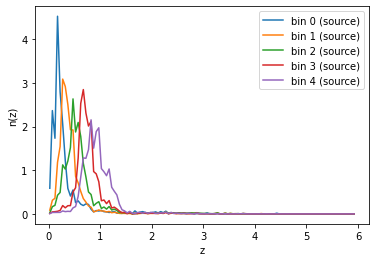

In [15]:
for bin_num in ['0','1','2','3','4']:
    plt.plot(stacked_photozs['n_of_z/source']['z'],stacked_photozs['n_of_z/source']['bin_'+bin_num],label='bin '+ bin_num + ' (source)')
plt.legend(loc='best')
plt.ylabel('n(z)')
plt.xlabel('z')
plt.show()

## Maps

In [16]:
import pandas as pd
import numpy as np
import healpy as hp

In [17]:
maps = h5py.File(path + "diagnostic_maps.hdf5",'r')

In [18]:
import healpy
import numpy as np
group = '/maps'
nside = 1024
npix = healpy.nside2npix(nside)
m = np.repeat(healpy.UNSEEN, npix)
pix = maps['maps']['depth']['pixel'][:]
val = maps['maps']['depth']['value'][:]
m[pix] = val

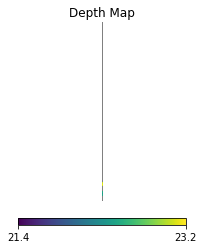

In [19]:
lon,lat=healpy.pix2ang(nside,pix,lonlat=True)
npix=healpy.nside2npix(nside)
if len(pix)==0:
    print(f"Empty map {map_name}")
if len(pix)==len(m):
    w = np.where((m!=healpy.UNSEEN)&(m!=0))
else:
    w = None
lon_range = [lon[w].min()-0.1, lon[w].max()+0.1]
lat_range = [lat[w].min()-0.1, lat[w].max()+0.1]
m[m==0] = healpy.UNSEEN
title = 'Depth Map'
view = 'cart'
if view == 'cart':
    healpy.cartview(m, lonra=lon_range, latra=lat_range, title=title, hold=True)#, **kwargs)
elif view == 'moll':
    healpy.mollview(m, title=title, hold=True)#, **kwargs)